In [25]:
import pickle
import string 
import nltk
from unidecode import unidecode
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score
from heapq import heappush, heappop
import sys
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [44]:
class AuthorClassifier:
    
    X_train = Y_train = X_test = Y_test = ""
    vectorizer_x = TfidfVectorizer()
    
    def __init__(self):
        name = "name"
        
    def Read(self,filename):
        TrainData = pd.read_csv(filename)
        return TrainData
    
    def PreProcessing(self,Data):
        print('shape - ', Data.shape[0])
        #print(Data.iloc[0,:])
        for i in range(Data.shape[0]):
            #remove numbers
            feature = Data.iloc[i,:]

            feature = ''.join(i for i in feature if not i.isdigit())
            #remove punctuation
            exclude = set(string.punctuation)
            feature = ''.join(ch for ch in feature if ch not in exclude)
            #print(feature)
            #encoding to ascii
            feature = unidecode(feature)
            feature = feature.lower()
            #tokenize
            tokenizer = RegexpTokenizer("\w+|\d\.]+|\S+")
            tokens = tokenizer.tokenize(feature)
            stopWords = set(stopwords.words('english'))
            val = 10
            New_Data = [w for w in tokens if not w in stopWords]
            Data.iloc[i,:] = ' '.join([str(w) for w in New_Data])
        return Data
    
    def results(self,y_test,y_pred):
        f1 = f1_score(y_test, y_pred, average="macro")
        ps = precision_score(y_test, y_pred, average="macro")
        rs = recall_score(y_test, y_pred, average="macro")
        acs = accuracy_score(y_test, y_pred)
        return np.array([acs, ps, rs, f1])
    
    
    def train(self,filename):
        Data = self.Read(self.filename)
        Data.columns = ['a','b','c']
        self.X_train  = Data.drop(['a','c'],axis = 1)
        self.X_train  = self.PreProcessing(self.X_train)
        self.Y_train  = Data['c']
        self.X_train = self.X_train.values.flatten()
        self.X_train = self.vectorizer_x.fit_transform(self.X_train)
    
    
    def PredictionUsingSvm(self):
        SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
        SVM.fit(self.X_train,self.Y_train)
        predictions_SVM = SVM.predict(self.X_test)
        return predictions_SVM
    
    def predict(self,filename):
        Data = self.Read(self.filename)
        Data.columns = ['a','b']
        self.X_test  = Data.drop(['a'],axis = 1)
        self.X_test = self.X_test.values.flatten()
        self.X_test = self.vectorizer_x.transform(self.X_test)
        return self.PredictionUsingSvm().flatten()
    
    def results(self,y_test,y_pred):
        f1 = f1_score(y_test, y_pred, average="macro")
        ps = precision_score(y_test, y_pred, average="macro")
        rs = recall_score(y_test, y_pred, average="macro")
        acs = accuracy_score(y_test, y_pred)
        return np.array([acs, ps, rs, f1])
    
a = AuthorClassifier()
Data = a.Read('Train.csv')
Data.columns = ['a','b','c']
Data1 = Data.drop(['c'],axis = 1)
y_test = Data['c']
a.train(Data)
predictions = a.predict(Data1)
print('results : ',a.results(y_test,predictions))
        
        
        
        
        
        
        
        
        
        
        
        

shape -  15663
results :  [0.95211645 0.95431384 0.9507247  0.95238384]


# Split Data

In [8]:


def SplitTestTrain(X, Y,percent = 0.8):
    mask = np.random.rand(len(X))<percent
    X_train = X[mask].dropna()
    X_test  = X[~mask].dropna()
    Y_train = Y[mask].dropna()
    Y_test  = Y[~mask].dropna()
    print(X_train.shape, X_test.shape)
    X_train = X_train.reset_index(drop = True)
    X_test  = X_test.reset_index(drop = True)
    Y_train = Y_train.reset_index(drop = True)
    Y_test  = Y_test.reset_index(drop = True)
    print("before return")
    return X_train, X_test, Y_train ,Y_test


# read Data

In [9]:
def Read(filename):
    TrainData = pd.read_csv(filename)
    return TrainData



# Preprocessing
### for preprocessing Feature extraction technique is used by doing tfidvectorization and also data is being cleaned by doing removal of the stop words and doing tokenization removing all the punctuation

In [10]:
def FeatureExtraction(X_train, X_test,MAX_NB_WORDS=75000):
    X_train = X_train.flatten()
    print("befor vect",X_train.shape)
    X_test  = X_test.flatten()
    vectorizer_x = TfidfVectorizer()
    X_train = vectorizer_x.fit_transform(X_train)
    X_test = vectorizer_x.transform(X_test)
    return X_train,X_test


In [11]:

def results(y_test,y_pred):
    f1 = f1_score(y_test, y_pred, average="macro")
    ps = precision_score(y_test, y_pred, average="macro")
    rs = recall_score(y_test, y_pred, average="macro")
    acs = accuracy_score(y_test, y_pred)
    return np.array([acs, ps, rs, f1])



In [12]:
import string  
from unidecode import unidecode
from nltk.tokenize import RegexpTokenizer
def PreProcessing(Data):
    print('shape - ', Data.shape[0])
    #print(Data.iloc[0,:])
    for i in range(Data.shape[0]):
        #remove numbers
        feature = Data.iloc[i,:]
        
        feature = ''.join(i for i in feature if not i.isdigit())
        #remove punctuation
        exclude = set(string.punctuation)
        feature = ''.join(ch for ch in feature if ch not in exclude)
        #print(feature)
        #encoding to ascii
        feature = unidecode(feature)
        feature = feature.lower()
        #tokenize
        tokenizer = RegexpTokenizer("\w+|\d\.]+|\S+")
        tokens = tokenizer.tokenize(feature)
        stopWords = set(stopwords.words('english'))
        val = 10
        New_Data = [w for w in tokens if not w in stopWords]
        Data.iloc[i,:] = ' '.join([str(w) for w in New_Data])
    return Data
Data = Read('Train.csv')
Data.columns = ['a','b','c']
X  = Data.drop(['a','c'],axis = 1)
val = PreProcessing(X)


shape -  15663


In [29]:
Data = Read('Train.csv')
Data.columns = ['a','b','c']
X  = Data.drop(['a','c'],axis = 1)
Y  = Data['c']
X_train, X_test, Y_train ,Y_test = SplitTestTrain(X,Y,percent = 0.8)
X_train =PreProcessing(X_train)
X_test  =PreProcessing(X_test)
X_train,X_test = FeatureExtraction(X_train.values,X_test.values,1000)
acc = []
c  = [1,10,25,50]
print(' shape x ',X_train.shape,' shape y ',Y_train.shape)
for C in c:
    SVM = svm.SVC(C, kernel='linear', degree=3, gamma='auto')
    SVM.fit(X_train,Y_train)
    predictions_SVM = SVM.predict(X_test)
    acc.append(accuracy_score(Y_test, predictions_SVM))
    
    
print(' results : accuracy , precesion, recall, f1_score : ',results(Y_test,predictions_SVM))


(12566, 1) (3097, 1)
before return
shape -  12566
shape -  3097
befor vect (12566,)
 shape x  (12566, 21273)  shape y  (12566,)
 results : accuracy , precesion, recall, f1_score :  [0.75912173 0.76019694 0.75726853 0.75863753]


## Performance Metrics

In [23]:
print(' results : accuracy , precesion, recall, f1_score : ',results(Y_test,predictions_SVM))


 results : accuracy , precesion, recall, f1_score :  [0.74621212 0.74891295 0.74124309 0.74439611]


## Confusion matrix

In [20]:
print('confusion matrix ')
print( confusion_matrix(Y_test,predictions_SVM))

confusion matrix 
[[983 116 143]
 [183 650  80]
 [162  69 711]]


# Classification Report

In [26]:
print('classification report')
print(classification_report(Y_test,predictions_SVM))

classification report
              precision    recall  f1-score   support

         EAP       0.73      0.79      0.76      1300
         HPL       0.76      0.73      0.74       874
         MWS       0.76      0.71      0.73       994

    accuracy                           0.75      3168
   macro avg       0.75      0.74      0.74      3168
weighted avg       0.75      0.75      0.75      3168



# Graph between C and (linear) accuracy and kernel vs accuacy

#### C vs accuracy

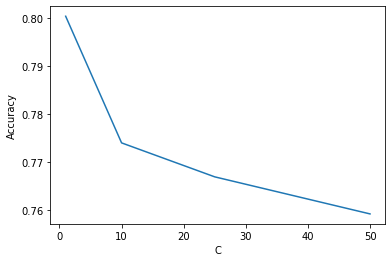

In [30]:
plt.plot(c,acc)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()


### C vs Kernel

 shape x  (12566, 21273)  shape y  (12566,)


AttributeError: module 'matplotlib.pyplot' has no attribute 'titile'

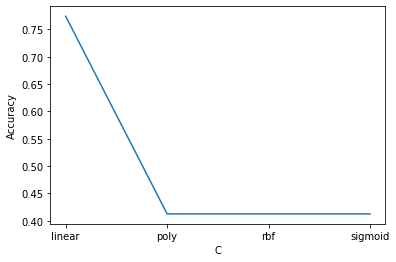

In [38]:
Kernel = ['linear','poly','rbf','sigmoid']
acc = []
print(' shape x ',X_train.shape,' shape y ',Y_train.shape)
for C in Kernel:
    SVM = svm.SVC(10, C, degree=3, gamma='auto')
    SVM.fit(X_train,Y_train)
    predictions_SVM = SVM.predict(X_test)
    acc.append(accuracy_score(Y_test, predictions_SVM))

plt.plot(Kernel,acc)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.titile('C vs Accuracy')
plt.show()
